---
# **Séquence 16 : Comparer des algorithmes**

## TP : Comparer des algorithmes de recherche
---



Dans cette activité, nous allons comparer deux méthodes pour effectuer une recherche dans un tableau trié en terme de coût, c'est à dire, en nous interessant au nombre d'opérations effectuées par la machine lors d'une execution.

### **Exercice 1**  
Nous aurons besoin d'un tableau trié pour tester les fonctions que vous allez programmer.
Dans la cellule de code ci-dessous, nous allons définir un tableau *Tab* (sous forme de liste contenant 100 éléments entiers tirés aléatoirement).

N'hésitez pas à le faire en compréhension.


In [1]:
from random import *
## Entrer ci-dessous le code Python pour répondre à la question précédente, puis executer le.
Tab=[randint(1,100) for i in range(0,100)]
## Tri du tableau en ordre croissant 
Tab.sort()


Vérifions le contenu de Tab en executant le code ci-dessous:

In [2]:
print(Tab)

[2, 5, 8, 9, 9, 9, 10, 11, 13, 15, 16, 17, 18, 18, 19, 20, 21, 21, 22, 23, 23, 25, 25, 26, 27, 28, 28, 29, 29, 29, 31, 31, 32, 33, 33, 36, 37, 39, 41, 42, 44, 45, 46, 47, 47, 49, 50, 50, 51, 53, 56, 58, 59, 60, 61, 62, 62, 66, 66, 66, 71, 71, 71, 72, 72, 73, 73, 74, 74, 77, 78, 79, 79, 80, 80, 81, 81, 81, 82, 82, 83, 83, 85, 86, 87, 88, 88, 89, 89, 92, 92, 94, 95, 96, 96, 96, 97, 98, 98, 98]


## **1) Mesurer le temps d'éxécution d'une portion de code avec Python.** 

Nous aurons besoin également dans cette activité de comparer la "rapidité" d'execution des algorithmes étudiés.  
La librairie `timeit` permet de mesurer le temps d'exécution d'un code Python. Pour cela, le code doit être répété un grand nombre de fois pour avoir une mesure pertinente. C'est ce que fait la librairie timeit: répéter le code pour mesurer son temps d'exécution

Le premier argument est le fragment de code dont on mesure le temps.
Le deuxième argument : `setup` est un fragment de code exécuté une seule fois.
`t.repeat(repeat=1000,number=1)` est la répétition du code spécifié dans `Timer`, le code est éxécuté repeat (ici 1000) fois.

Nous prendrons la valeur minimale des temps obtenus.
Vous pouvez observer, executer et completer les exemples suivants. 

In [3]:
import timeit 
t=timeit.Timer('sin(1.2)',setup='from math import sin')
#répète sin(1.2) 1000 fois et prend le plus petit temps d'execution
min(t.repeat(repeat=1000,number=1)) 


1.999999987845058e-07

In [4]:
# On peut vérifier que passer à 10000 exécution ne change pas *beaucoup* le temps d'exécution moyen.
t=timeit.Timer('sin(1.2)',setup='from math import sin')
#CODE A COMPLETER
min(t.repeat(repeat=10000,number=1)) 
#répète sin(1.2) 10000 fois et prend le plus petit temps d'execution

9.999999761589606e-08

## 2) Recherche **séquentielle** dans un tableau trié
L'algorithme présenté ci-dessous en langage naturel permet, de manière naïve, de rechercher un élément dans un tableau. 

**fonction recherche**  *(tableau T,entier k) :*   
>*Données : T est un tableau trié d'entiers, k un nombre entier*  
>*Resultat : Le premier indice i où se trouve l'élement k, si k est dans le tableau, -1 sinon.*  
>$i=0$   
>$l=longueur(T)$  
>**Tant que** $(i\leqslant l-1)$ **et** $T[i]\neq k$ **faire** :  
>> $i=i+1$  

> **si** $i<l$ **alors** retourner i **sinon** retourner -1
  









### **Exercice 3 :** 
1.a) Traduisez cet algorithme en langage Python en codant la fonction *recherche* dont l'en-tête est déjà proposée ci-dessous (la fonction retournera -1 si l'élément est absent, le plus petit indice où se trouve l'élément recherché sinon).




In [5]:
def recherche(T:list,k:int)->int:
  i=0
  l=len(T)
  while (i<l) and (T[i]!=k):
    i=i+1
  if i<l :
    return i
  else :
    return -1

1.b) Tester votre fonction ci-dessous (un premier test est proposé)

In [6]:
print(recherche(Tab,101)) # Le résultat doit être -1
## Ajouter des tests ci-dessous et éxécuter les.
print(recherche(Tab,10))
print(recherche(Tab,95))

-1
6
92


1.c) Le code ci-dessous permet de mesurer le temps d'execution de la fonction *recherche* appliquée au tableau *tab* pour la valeur 101. Cette valeur est nécessairement absente du tableau, et impose donc une vérification dans l'ensemble du tableau, soit une éxecution dans **dans le pire des cas**.

Nous prendrons la valeur minimale des temps obtenus.   
**Quelle est le temps d'execution minimal observé?**


In [7]:
import timeit

test1 = timeit.Timer("recherche(Tab,101)", "from __main__ import recherche,Tab")
min(test1.repeat(repeat=10000,number=1)) 

5.699999995556482e-06

## 3) Recherche **dichotomique** dans un tableau trié
L'algorithme présenté ci-dessous en langage naturel permet d'effectuer la recherche d'élément, mais en procédant cette fois à une **dichotomie**.  
L'algorithme fonctionne sur le principe suivant :

* Trouver la position la plus centrale du tableau (si le tableau est vide, sortir).
* Comparer la valeur de cette case à l'élément recherché.
* Si la valeur est égale à l'élément, alors retourner la position, sinon reprendre la procédure dans la moitié de tableau pertinente.

On peut toujours se ramener à une moitié de tableau sur un tableau trié en ordre croissant. Si la valeur de la case est plus petite que l'élément, on continuera sur la moitié droite, c'est-à-dire sur la partie du tableau qui contient des nombres plus grands que la valeur de la case. Sinon, on continuera sur la moitié gauche.   
**Exemple :** Dans le tableau présentée ci-dessous, on cherche la valeur 4.

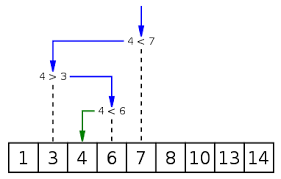

**fonction recherche_dicho**  *(tableau T,entier val) :*   
* **Données** : *T est un tableau trié d'entiers, val un nombre entier*  
* **Resultat** : *Le premier indice i où se trouve l'élement val, si val est dans le tableau, -1 sinon.*  


>$trouve = faux$  
>$l=longueur(T)$  
>$i=0$  
>$debut=0$  
>$fin=l-1$  
>**Tant que** $non(trouve)$ **et** $début \leqslant fin$ :  
>>$mil=PartieEntiere((début + fin)/2)$  
>>**si** $t[mil]=val$ **alors** 
>>>$trouve=vrai$   

>>**sinon**:
>>>**si** $val > t[mil]$ **alors**
>>>>$début=mil+1$

>>>**sinon**:
>>>>$fin=mil-1$   

> **Si** $trouve = vrai$ **alors**:  
>>retourner $mil$

>**Sinon**:
>>retourner $-1$









### **Exercice 3 :**   
3.a) Traduire cet algorithme en langage Python.

In [8]:
from math import floor  ## Partie entière d'un nombre



def recherche_dicho(T:list, val:int)->int:
  trouve=False
  l=len(T)
  i=0
  debut=0
  fin=l-1
  while (not(trouve)) and (debut<=fin):
    mil=floor((debut+fin)/2)
    if T[mil]==val:
      trouve=True
    else:
      if val>T[mil]:
        debut=mil+1
      else:
        fin=mil-1
  if trouve :
    return mil
  else :
    return -1



3.b) Effectuer quelques tests ci-dessous.

In [9]:
print(recherche_dicho(Tab,101)) # Le résultat doit être -1
## Ajouter des tests ci-dessous et éxécuter les.
print(recherche_dicho(Tab,10))
print(recherche_dicho(Tab,5))

-1
6
1


3.c) En vous inspirant du code de la question 2c, mesurez le temps minimal parmi 10000 executions de l'appel *recherche_dicho(Tab,101)*.  
Comparer votre résultat à celui obtenu à la question 2c).  
**Que remarque-t-on?**




In [10]:
import timeit

test2 = timeit.Timer("recherche_dicho(Tab,101)", "from __main__ import recherche_dicho,Tab")
min(test2.repeat(repeat=10000,number=1)) 

2.199999997287705e-06

## **3) Recherche dans une matrice** 
On souhaite maintenant rechercher un élément dans une matrice carrée (tableau de tableau comportant autant de lignes que de colonnes). On pourra utiliser les fonctions de recherche dans un tableau codées précedemment.



### **Exercice 4**
4.a) Générer aléatoirement dans un premier temps une matrice M de test comportant des nombres entiers compris entre 0 et 1000, de dimension 100*100.

In [11]:
from random import *
## Entrer ci-dessous le code Python pour répondre à la question précédente, puis executer le.
M=[[randint(0,1000) for i in range(0,100)] for j in range(0,100)]



4.b) Coder ci-dessous une fonction de recherche d'une valeur dans la matrice qui renvoie en résultat un tuple composé du numéro de ligne et de colonne de la première occurence de cette valeur si elle a été trouvée dans la matrice, le tuple *(-1,-1)* sinon.


In [12]:
def recherche_matrice(M:list,val:int)->tuple:
  i=0
  trouve=False
  while not(trouve) and (i<len(M)):
    ligne_courante=M[i]
    j=0
    while not(trouve) and (j<len(ligne_courante)):
      if ligne_courante[j]==val:
        trouve=True
      else :
        j=j+1
    if not(trouve):
      i=i+1
  if trouve:
    return i,j
  else:
    return -1,-1


4.c) Effectuer quelques tests ci-dessous.

In [13]:
print(recherche_matrice(M,1001)) # Le résultat doit être (-1,-1)
## Ajouter des tests ci-dessous et éxécuter les.
print(recherche_matrice(M,10))
print(recherche_matrice(M,5))

(-1, -1)
(56, 38)
(3, 52)


4.d) En vous inspirant du code de la question 2c, mesurez le temps minimal parmi 10000 executions de l'appel *recherche_matrice(M,1001)*.  
Comparer votre résultat à ceux obtenus précédemment.  
**Que remarque-t-on?**




In [ ]:
import timeit

test3 = timeit.Timer("recherche_matrice(M,1001)", "from __main__ import recherche_matrice,M")
print(min(test3.repeat(repeat=10000,number=1)))